In [1]:
import os
for dirname, _, filenames in os.walk('D:\data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
    
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# full display of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [5]:
df = pd.read_csv("D:\data.csv")

In [6]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

In [7]:
# Convert the columns to numeric.
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [8]:
# Split data into Features and Target
X = df.drop(['Personality'], axis=1)
y = df['Personality']

In [9]:
# Split Data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    #'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    #'CatBoost Classifier': CatBoostClassifier(random_state=42, verbose=False),
    'XGBoost': XGBClassifier(random_state=42)
}

# Training the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")
    
print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print("\n")
print(f"Best model: {best_model_name} with R2: {best_model_score:.2f}")

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
XGBoost trained.
--------------------------------------------------------------------
Linear Regression MSE: 6.44, R2: 0.65
Random Forest MSE: 4.95, R2: 0.73
Decision Tree MSE: 6.32, R2: 0.65
XGBoost MSE: 5.18, R2: 0.72


Best model: Random Forest with R2: 0.73


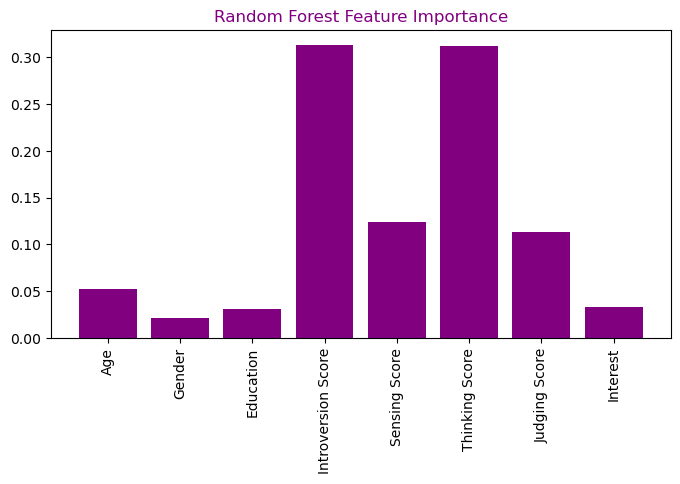

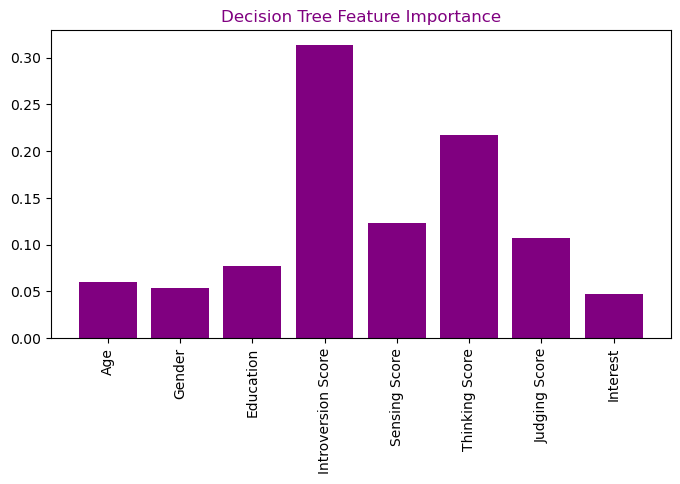

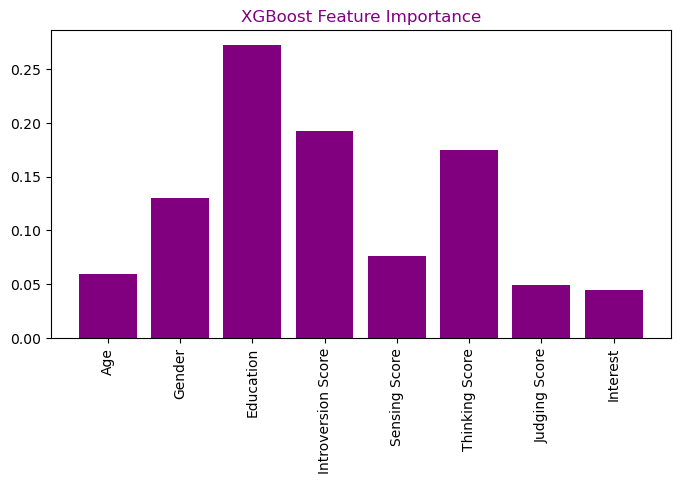

In [11]:
# Feature Importance
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8, 4))
        plt.bar(range(len(feature_importances)), feature_importances, color = 'purple')
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f"{name} Feature Importance", color = 'purple')
        plt.show()

In [12]:
# Fit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgbc = XGBClassifier(random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [13]:
# Predict the Test set results

y_pred = xgbc.predict(X_test)

In [14]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8984


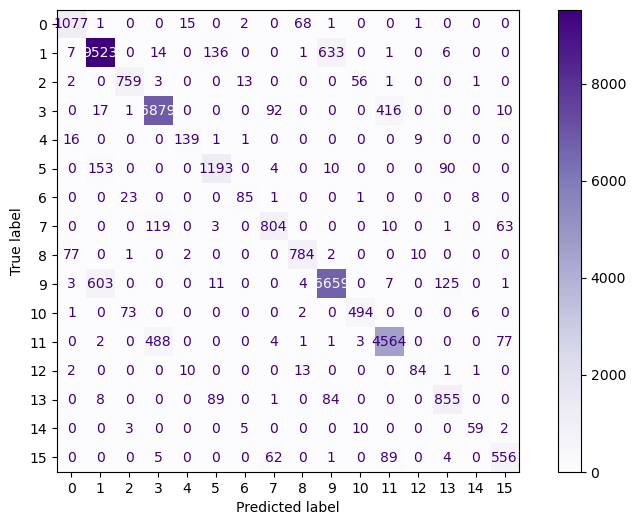

In [15]:
# ConfusionMatrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Purples, normalize = None, ax = ax)

In [16]:
# classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1165
           1       0.92      0.92      0.92     10321
           2       0.88      0.91      0.90       835
           3       0.92      0.93      0.92      7415
           4       0.84      0.84      0.84       166
           5       0.83      0.82      0.83      1450
           6       0.80      0.72      0.76       118
           7       0.83      0.80      0.82      1000
           8       0.90      0.89      0.90       876
           9       0.90      0.90      0.90      7413
          10       0.88      0.86      0.87       576
          11       0.90      0.89      0.89      5140
          12       0.81      0.76      0.78       111
          13       0.79      0.82      0.81      1037
          14       0.79      0.75      0.77        79
          15       0.78      0.78      0.78       717

    accuracy                           0.90     38419
   macro avg       0.85   